# Part 2: Basic Visualization {-}

This Part covers basic tools for visualizing data in Python.

Visualization techniques are critical to discovering and
understanding the relationships between variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

\newpage

## Example Data Set {-}

First, we will revisit the data set we considered in the previous
Part, and the steps needed to properly format the data:

In [2]:
fulldata =\
   pd.read_csv("q1_2017_all.csv", sep=",")
fulldata['Date'] =\
   pd.to_datetime(fulldata['Date'],\
    format='%Y%m%d')
fulldata =\
   fulldata.drop_duplicates(subset=\
    ('Date','Ticker'), keep='first')
fulldata = fulldata.copy()
fulldata['McapRank'] =\
   fulldata['McapRank'].astype('category').\
    cat.as_ordered()
fulldata['TurnRank'] =\
   fulldata['TurnRank'].astype('category').\
    cat.as_ordered()
fulldata['VolatilityRank'] =\
   fulldata['VolatilityRank'].astype('category').\
    cat.as_ordered()
fulldata['PriceRank'] =\
   fulldata['PriceRank'].astype('category').\
    cat.as_ordered()

\newpage

## Basic Plots {-}

We saw the use of boxplot in a previous Part. A similar view of
the shape of a distribution can be obtained using a **histogram**,
formed using the `matplotlib` function `hist()`:

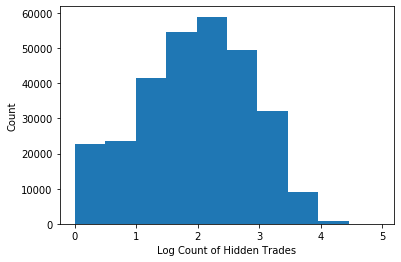

In [3]:
fig = plt.figure(figsize=[6,4])
axs = fig.subplots(1,1)
axs.hist(np.log10(fulldata['Hidden']\
    [fulldata['Hidden'] > 0]))
axs.set_ylabel("Count")
axs.set_xlabel("Log Count of Hidden Trades")
plt.show()

\newpage

**Exercise:** Parse the syntax of the code above to understand some basic aspects of `matplotlib`.

\answerlines{20}

\newpage

**Exercise:** How could this plot be improved?

\answerlines{10}

\newpage

**Scatter plots** are ubiquitous, as well. They are created simply
in Python using the `plot()` method.

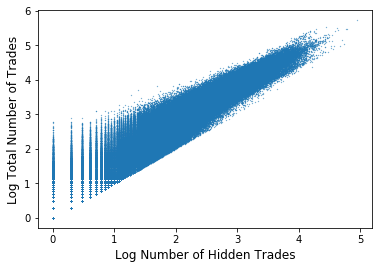

In [4]:
# ignore types of errors
with np.errstate(divide='ignore', invalid='ignore'):
    fig, axs = plt.subplots(1, 1, figsize=[6,4])
    axs.plot(np.log10(fulldata['Hidden']),
         np.log10(fulldata['TradesForHidden']),
         marker='.', ms=0.5, linestyle="none")
    axs.set_xlabel("Log Number of Hidden Trades",
        size=12)
    axs.set_ylabel("Log Total Number of Trades",
        size=12)
    plt.show()

**Exercise:** Comment on the Python syntax in the previous example.

\answerlines{20}

\newpage

The Python package `Seaborn` allows for more sophisticated visualization. This package builds on `matplotlib` in useful ways. See https://seaborn.pydata.org/ for more detailed information and documentation.

In [5]:
import seaborn as sns

Let's start with a simple scatter plot, constucted via `scatterplot`:

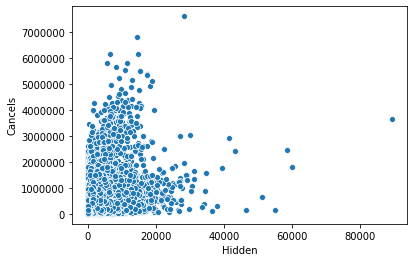

In [6]:
plt.figure(figsize=[6,4])
ax = sns.scatterplot(x="Hidden", y="Cancels",
        data=fulldata)

\newpage

Let's make an improved version.

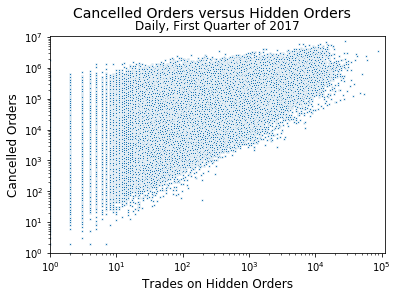

In [7]:
plt.figure(figsize=[6,4])
ax = sns.scatterplot(x="Hidden", y="Cancels",
    data=fulldata, s=5)
ax.set(xscale="log", yscale="log",
       xlim=(1, None), ylim=(1, None))
plt.suptitle("Cancelled Orders versus Hidden Orders",
       size=14)
plt.title("Daily, First Quarter of 2017")
plt.xlabel("Trades on Hidden Orders", size=12)
plt.ylabel("Cancelled Orders", size=12)
plt.show()

**Exercise:** Comment on the improvements made here.

\answerlines{10}

\newpage

The `hue` argument can be changed to vary with the levels
of one of the categorical variables.

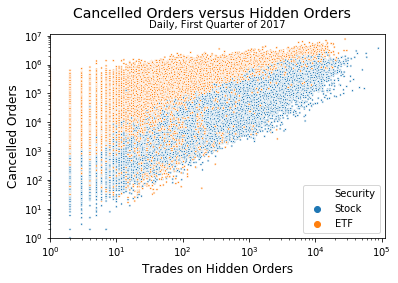

In [8]:
plt.figure(figsize=[6,3.75])
ax = sns.scatterplot(x="Hidden", y="Cancels",
    data=fulldata, s=5, hue="Security")
ax.set(xscale="log", yscale="log",
       xlim=(1, None), ylim=(1, None))
plt.suptitle("Cancelled Orders versus Hidden Orders",
       size=14)
plt.title("Daily, First Quarter of 2017", size=10)
plt.xlabel("Trades on Hidden Orders", size=12)
plt.ylabel("Cancelled Orders", size=12)
plt.show()

## Distributions of Categorical Variables {-}

Basic bar charts can be created to inspect the distribution of a categorical variable, using `countplot()`:

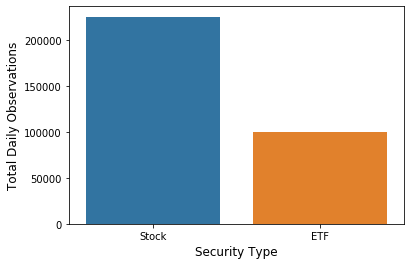

In [9]:
plt.figure(figsize=[6,4])
ax = sns.countplot(x="Security", data=fulldata)
plt.xlabel("Security Type", size=12)
plt.ylabel("Total Daily Observations", size=12)
plt.show()

\newpage

For the next plots, we will restrict to data that do not have missing values on `McapRank`, and are of type `Stock`:

In [10]:
fulldataStock = fulldata[\
  (fulldata["Security"] == "Stock") \
    & (fulldata["McapRank"].notnull())]

**Exercise:** Consider the command below. What is the result?

In [11]:
df = fulldataStock.groupby(['McapRank',\
    'VolatilityRank'])['McapRank'].\
    count().unstack()

\answerlines{13}

\newpage

The **stacked bar chart** created below visualizes these data.

<Figure size 648x504 with 0 Axes>

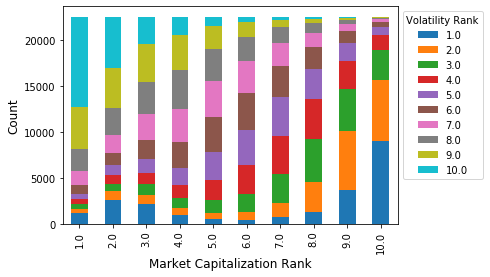

In [12]:
plt.figure(figsize=[9,7])
df.plot(kind='bar', stacked=True, legend=False)
plt.xlabel("Market Capitalization Rank",
    size=12)
plt.ylabel("Count", size=12)
plt.legend(title="Volatility Rank",
    bbox_to_anchor=(1.0, 1.0))
plt.show()

**Exercise:** In this case, the two variables are ordinal. Would the plot make sense if either variable was categorical (and not ordinal)?

\answerlines{8}

\newpage

The **heat map** created below gives another visualization of the same data.

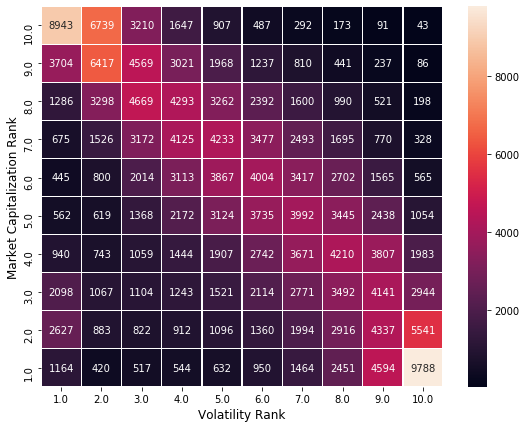

In [13]:
plt.figure(figsize=[9,7])
ax = sns.heatmap(df, annot=True,
   fmt='d', linewidths=.5)
ax.invert_yaxis()
plt.xlabel("Volatility Rank", size=12)
plt.ylabel("Market Capitalization Rank", size=12)
plt.show()

\newpage

When comparing a ratio variable versus a categorical or ordinal variable, **side-by-side boxplots** are a standard choice.

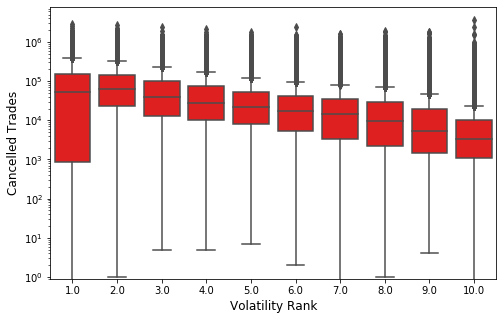

In [14]:
plt.figure(figsize=[8,5])
ax = sns.boxplot(x="VolatilityRank", y="Cancels", 
    data=fulldataStock,color="red")
ax.set(yscale="log", ylim=(0.9, None))
plt.xlabel("Volatility Rank",size=12)
plt.ylabel("Cancelled Trades",size=12)
plt.show()

\newpage

Seaborn includes **boxenplots** to provide a similar, but more sophisticated, look at the data.

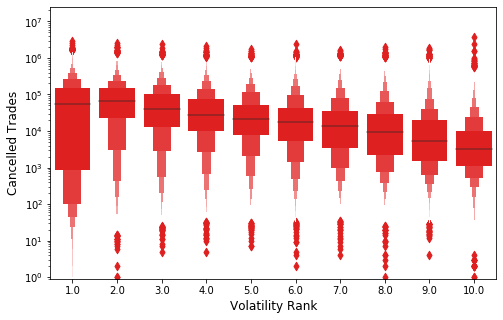

In [15]:
plt.figure(figsize=[8,5])
ax = sns.boxenplot(x="VolatilityRank",
    y="Cancels", 
    data=fulldataStock,color="red")
ax.set(yscale="log", ylim=(0.9, None))
plt.xlabel("Volatility Rank",size=12)
plt.ylabel("Cancelled Trades",size=12)
plt.show()

\newpage

## Facets {-}

**Facets** refer to the plots that form a grid. Typically one or more 
categorical/ordinal variables vary on the rows and columns of the grid.

The example below compares the relationship between the number of cancelled
orders and trades on hidden orders, as both a function of security type
and month.

Note first how the `Month` column is added to the data frame.

<Figure size 576x360 with 0 Axes>

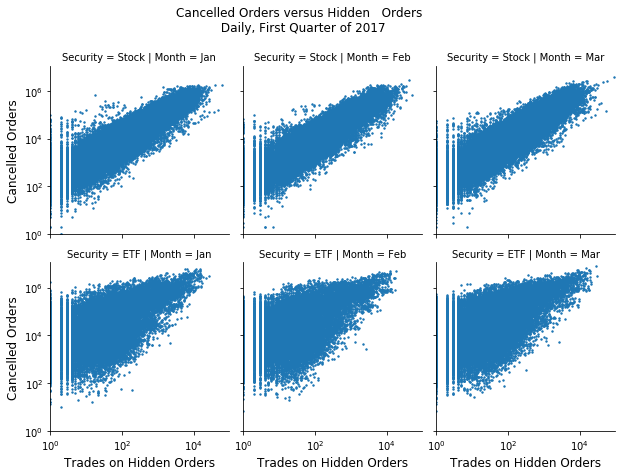

In [16]:
fulldata["Month"] = fulldata["Date"].\
   map(lambda x: x.strftime("%b"))
plt.figure(figsize=[8,5])
g = sns.FacetGrid(fulldata, col="Month",
   row="Security")
g.map(plt.scatter, "Hidden", "Cancels", s=2)
g.set(xscale="log", yscale="log",
   xlim=(1, None), ylim=(1, None))
g.fig.suptitle("Cancelled Orders versus Hidden\
   Orders \n Daily, First Quarter of 2017", y=1.08)
g.set_xlabels("Trades on Hidden Orders",
   size=12)
g.set_ylabels("Cancelled Orders",
   size=12)
g.add_legend()
plt.show()

**Exercise:** Explore https://seaborn.pydata.org/examples/index.html to discover additional ideas for visualization. We will be utilizing some of these approaches as they become relevant.